In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
import tensorflow
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
from tensorflow.keras.models import load_model

In [14]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [6]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [7]:
# load VGG model
vgg_model = vgg16.VGG16(weights='imagenet')

553476096/553467096 [==============================] - 3s 0us/step


In [8]:
# load V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')

96124928/96112376 [==============================] - 0s 0us/step


In [9]:
# load resnet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 0s 0us/step


In [10]:
# load mobilenet model
mibilenet_model = mobilenet.MobileNet(weights='imagenet')

17235968/17225924 [==============================] - 0s 0us/step


In [12]:
# save model
vgg_model.save('model/vgg_model.h5')
inception_model.save('model/inception_model.h5')
resnet_model.save('model/resnet_model.h5')
mibilenet_model.save('model/mibilenet_model.h5')

In [13]:
# load model
vgg_model = load_model('model/vgg_model.h5')
inception_model = load_model('model/inception_model.h5')
resnet_model = load_model('model/resnet_model.h5')
mibilenet_model = load_model('model/mibilenet_model.h5')

PIL image size (224, 224)


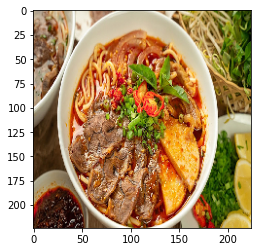

In [32]:
filename = 'data/chapter_3/bun-bo-1.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224,224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

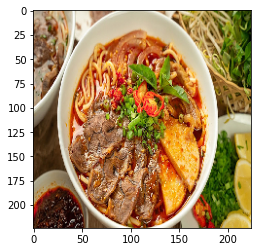

numpy array size (224, 224, 3)


In [33]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


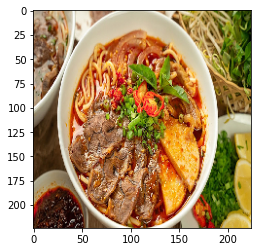

In [34]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at 
# a particular axis
# We want the input matrix to the network to be of 
# the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


### **Predict**

In [35]:
processed_image = vgg16.preprocess_input(image_batch.copy())

predictions = vgg_model.predict(processed_image)

In [36]:
label = decode_predictions(predictions)
print(label)

[[('n04263257', 'soup_bowl', 0.24802543), ('n07590611', 'hot_pot', 0.18816578), ('n07579787', 'plate', 0.094100796), ('n07718472', 'cucumber', 0.051357985), ('n07583066', 'guacamole', 0.051214535)]]


PIL image size (224, 224)


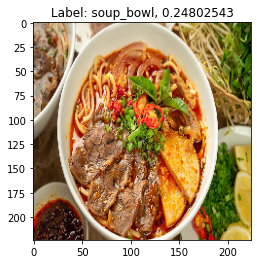

In [37]:
original = load_img(filename, target_size=(224,224))
print('PIL image size',original.size)
plt.imshow(original)
plt.title('Label: ' + label[0][0][1] + ", " + str(label[0][0][2]))
plt.show()

### **Model khác**

In [38]:
# prepare the image for the Intercept_V3 
# input: (299, 299, 3)
original2 = load_img(filename, target_size=(299,299))
numpy_image2 = img_to_array(original2)
image_batch2 = np.expand_dims(numpy_image2, axis=0)
processed_image_m2 = inception_v3.preprocess_input(image_batch2.copy())


[[('n07590611', 'hot_pot', 0.5349402), ('n04263257', 'soup_bowl', 0.3469584), ('n02939185', 'caldron', 0.010206698), ('n07584110', 'consomme', 0.008429079), ('n07583066', 'guacamole', 0.0043079224)]]
PIL image size (224, 224)


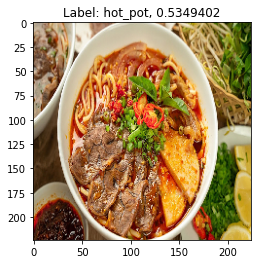

In [40]:
predictions = inception_model.predict(processed_image_m2)

label = decode_predictions(predictions)
print(label)

original = load_img(filename, target_size=(224,224))
print('PIL image size',original.size)
plt.imshow(original)
plt.title('Label: ' + label[0][0][1] + ", " + str(label[0][0][2]))
plt.show()